<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/make_moons_classify_using_2_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split as tts
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print(tf.__version__)

# fix the seed to the RNG
random_state = 42
np.random.seed(random_state)

2.8.2


[(5000, 2), (5000,)]


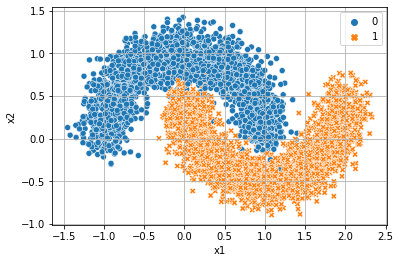

[(3750,), (1250,)]
[1875 1875]
[625 625]
[(3750,), (1250,)]


In [65]:
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=5000, noise=0.15)

def plotMyDataset(x,y):
  print([x.shape, y.shape])
  ax = sns.scatterplot(x=x[:,0],y=x[:,1], hue=y, style=y)
  ax.set(xlabel='x1', ylabel='x2')
  plt.grid()
  plt.show()

plotMyDataset(x,y)

# divide the data into training and testing
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.25, stratify=y, random_state=random_state)
print([ytrain.shape, ytest.shape])
print(np.bincount(ytrain))
print(np.bincount(ytest))

print([ytrain.shape, ytest.shape])

In [3]:
# visualize your results
def visualizeMyModel(x, y, model):
  xmin = np.min(x[:,0])#-0.5
  xmax = np.max(x[:,0])#+0.5

  ymin = np.min(x[:,1])#-0.5
  ymax = np.max(x[:,1])#+0.5

  xg, yg = np.meshgrid(np.linspace(xmin, xmax, num=20), np.linspace(ymin, ymax, num=20))
  z = np.round(model.predict(np.hstack((xg.reshape(-1,1), yg.reshape(-1,1)))))
  #z = np.argmax(model.predict(np.hstack((xg.reshape(-1,1), yg.reshape(-1,1)))),axis=1)
  print(xg.shape)
  print(z.shape)
  print(np.size(xg))

  plt.contourf(xg, yg, z.reshape(xg.shape))
  ax = plt.gca()
  sns.scatterplot(x=x[:,0],y=x[:,1], hue=y, style=y, ax=ax)
  plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 4)                 12        
                                                                 
 dense2 (Dense)              (None, 2)                 10        
                                                                 
 prediction (Dense)          (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
(20, 20)
(400, 1)
400


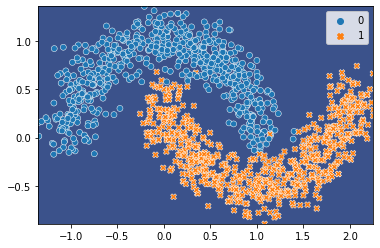

In [52]:
# model selection
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

#feed forward model
model1 = Sequential()
model1.add(Dense(4, input_shape=(2,), name='dense1'))        #activation='relu', 'sigmoid', 'tanh', default is linear activation function
#model.add(Dropout(0.5))
model1.add(Dense(2, activation='relu',name='dense2'))
model1.add(Dense(1, activation='sigmoid', name='prediction'))

#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model1.summary()
plot_model(model1, to_file='moons.png', show_shapes=True, show_layer_names=True)

# plot decision boundary of the initialized model 
visualizeMyModel(xtest, ytest, model1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


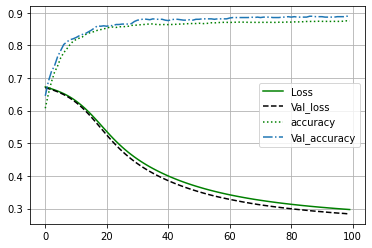

In [54]:
epochs = 100
history = model1.fit(xtrain, ytrain, batch_size=128, epochs=epochs, verbose=0, validation_split=0.2)

print(history.history.keys())

plt.plot(range(0, epochs), history.history['loss'], label = "Loss", linestyle="-",color='green')
plt.plot(range(0, epochs), history.history['val_loss'], label = "Val_loss", linestyle="--", color='black')
plt.plot(range(0, epochs), history.history['accuracy'], label = "accuracy", linestyle=":",color='green')
plt.plot(range(0, epochs), history.history['val_accuracy'], label = "Val_accuracy", linestyle="-.", )
plt.legend()
plt.grid()
plt.show()


In [55]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred =np.round(model.predict(xtest)) 

# use np.argmax in case of sofmax layer
#ypred = np.argmax(model.predict(xtest), axis=1)

#for a, b in zip(ytest, ypred):
#  print(a, b)

print('Confusion matrix:')
print(confusion_matrix(ytest, ypred))

print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest, ypred, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest, ypred, average='weighted'),100))

Confusion matrix:
[[619   6]
 [  4 621]]
Precision score = 99.201 %
Recall score = 99.200 %


(20, 20)
(400, 1)
400


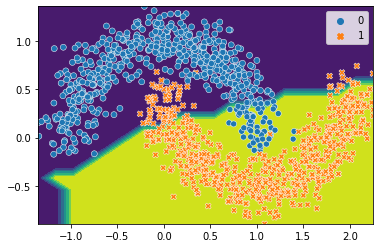

In [56]:
visualizeMyModel(xtest, ytest, model1)

Confusion matrix:
[[617   8]
 [  4 621]]
Precision score = 99.042 %
Recall score = 99.040 %
(20, 20)
(400,)
400


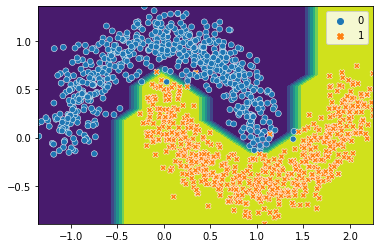

In [62]:
# use of KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
model2 = KNN(n_neighbors=3)
model2.fit(xtrain, ytrain)
ypred=model2.predict(xtest)
print('Confusion matrix:')
print(confusion_matrix(ytest, ypred))

print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest, ypred, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest, ypred, average='weighted'),100))

visualizeMyModel(xtest, ytest, model2)